## Problem (1)

In [62]:
import numpy as np
from itertools import product # to create all possible combinations of input iterable.
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [3]:
def step(x):
    if (x < 0):
        return 0
    return 1

def relu(x):
    if (x <= 0):
        return 0
    return x

In [4]:
def Network(x):
    W1, b1, W2, b2, W3, b3 = BiasWeights()
    
    z1 = np.dot(W1, x) + b1
    a1 = np.zeros(len(z1))
    for i in range(len(z1)):
        a1[i] = relu(z1[i])
    
    z2 = np.dot(W2, a1) + b2
    a2 = np.zeros(len(z2))
    for i in range(len(z2)):
        a2[i] = step(z2[i])
        
    z3 = np.dot(W3, a2) + b3
    output = np.zeros(len(z3))
    for i in range(len(z3)):
        output[i] = step(z3[i])  
    
    return output

def BiasWeights():
    inputs = 4
    hidden1 = 8
    hidden2 = 22
    outputs = 3
    
    W1 = np.block([[np.eye(4)], [-1*np.eye(4)]])
    b1 = np.block([np.zeros((hidden1-inputs)), np.ones((inputs))])
    
    W2 = np.array(
        [[0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 1, 0, 1],
        [1, 0, 1, 1, 0, 1, 0, 0],
        [1, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 0, 0, 0, 0],

        [0, 0, 1, 0, 1, 1, 0, 1],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 0, 1, 1, 0],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0],

        [0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 1, 1],
        [0, 1, 1, 0, 1, 0, 0, 1],
        [1, 0, 0, 1, 0, 1, 1, 0],
        [1, 0, 1, 1, 0, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 0, 0, 1]]
    )
    b2 = -4*np.ones(hidden2)
    
    W3 = np.block(
        [[np.ones(6), np.zeros(16)],
        [np.zeros(6), np.ones(8), np.zeros(8)], 
        [np.zeros(14), np.ones(8)]]
    )
    b3 = -1*np.ones(outputs)
    
    return W1, b1, W2, b2, W3, b3

In [5]:
input1 = product([0,1], [0,1])
input2 = product([0,1], [0,1])
inputs = list(product(input1, input2))

for input_ in inputs:
    x = list(input_[0] + input_[1])
    output = Network(x)
    print(f'{np.array(x).astype(int)}: {(output.astype(int))}')

[0 0 0 0]: [0 0 0]
[0 0 0 1]: [0 0 1]
[0 0 1 0]: [0 1 0]
[0 0 1 1]: [0 1 1]
[0 1 0 0]: [0 0 1]
[0 1 0 1]: [0 1 0]
[0 1 1 0]: [0 1 1]
[0 1 1 1]: [1 0 0]
[1 0 0 0]: [0 1 0]
[1 0 0 1]: [0 1 1]
[1 0 1 0]: [1 0 0]
[1 0 1 1]: [1 0 1]
[1 1 0 0]: [0 1 1]
[1 1 0 1]: [1 0 0]
[1 1 1 0]: [1 0 1]
[1 1 1 1]: [1 1 0]


## Problem (2)

**(a)** 
We know that the activation function for the hidden layers by using the $ReLU$ activation function is given by :
\begin{align*}
	a = ReLU(w^Tx+b)
\end{align*}
The $ReLU$ activation function for the output layers is :
\begin{align*}
	\Phi_{w,b,v,b'} (x) = ReLU(v^Ta+ b') 
\end{align*}
Therefore :
\begin{align*}
	\Phi_{w,b,v,b'}(x) =  ReLU(v^T ReLU (w^Tx+b)+ b') 
\end{align*}
We can write :
\begin{align}
		\Phi_{cw,cb,v,cb'}(x) &=  ReLU(v^TReLU(cw^Tx+cb)+ cb') \\
		&= ReLU(v^T ReLUc(w^Tx+b)+ cb') \label{1}
\end{align}
We have two cases:
**First** if c$>$ 0 :
$$ReLUc
(w^Tx+b )= \max(0, c(w^Tx+b))$$
\begin{align*}
	 ReLUc(w^Tx+b) = 
	 \begin{cases}
	 	c(w^Tx+b) \quad \text{if } \quad c(w^Tx+b) \ge 0 \\
	 	0 \quad \text{if} \quad c(w^Tx+b) < 
	 	0 
	 \end{cases}
\end{align*}
\begin{align*}
	 ReLUc(w^Tx+b) &= cReLU(w^Tx+b)
\end{align*}
Substitute back in \eqref{1} :
\begin{align*}
		\Phi_{cw,cb,v,cb'}(x) &= ReLU(v^T cReLU(w^Tx+b)+ cb')\\
		&= ReLU(cv^T ReLU(w^Tx+b)+ cb')\\
		&= \max (0, cv^T ReLU(w^Tx+b)+cb')\\
		&= c \max (0,v^TReLU(w^Tx+b)+b') \\
		&= cReLU(v^TReLU(w^Tx+b)+b')\\
		&= c	\Phi_{cw,cb,v,cb'}(x)
\end{align*}
**Second** if c$<$ 0 :
\begin{align*}
		\Phi_{cw,cb,v,cb'}(x) = ReLU(v^TReLUc(w^Tx+b)+cb')
\end{align*}
$$ReLU(w^Tx+b) =0 \quad \text{if} \quad c(w^Tx+b)< 0 $$ 

\begin{align*}
	\Phi_{cw,cb,v,cb'} (x)&= ReLU(0+cb')\\
	&= ReLU(cb')
\end{align*}





**(b)** \\
We were given that :
\begin{align*}
	\Phi_{w,b}(x) = S(w^Tx+b)
\end{align*}
We can write :
\begin{align}
	\Phi_{cw,cb}(x) = S(cw^Tx+cb) \label{2}
\end{align}
The sigmoid function is given by :
\begin{align*}
	S(x) = \frac{1}{1+ \exp(-x)}
\end{align*}
Then:
\begin{align*}
		S(cw^Tx+cb) = \frac{1}{1+ \exp(-(cw^Tx+cb))} \\
\end{align*}
Substitute back in \eqref{2} :

\begin{align*}
	\Phi_{cw,cb}(x) = \frac{1}{1+ \exp(-(cw^Tx+cb))}
\end{align*}
Take the limit for both sides:
\begin{align*}
	\lim_{c \rightarrow \infty} 	\Phi_{cw,cb}(x)  = \lim_{c \rightarrow \infty} \left[  \frac{1}{1+ \exp(-(cw^Tx+cb))}\right]
\end{align*}
**If** $w^Tx+b >0 $ :
\begin{align*}
	\lim_{c \rightarrow \infty} 	\Phi_{cw,cb}(x) &= \frac{1}{1+ \exp (-\infty)}\\
	&= 1
\end{align*}
**If** $w^Tx+b <0 $ :
\begin{align*}
	\lim_{c \rightarrow \infty} 	\Phi_{cw,cb}(x) &= \frac{1}{1+ \exp (\infty)}\\
	&= \frac{1}{\infty}\\
	&= 0
\end{align*}
Therefore :
\begin{align*}
	\lim_{c \rightarrow \infty} 	\Phi_{cw,cb}(x) &= 
	\begin{cases}
		1 \quad \text{if} \quad  w^Tx+b \ge 0 \\
		0 \quad \text{if} \quad  w^Tx+b <0 
	\end{cases} \\
&= H(w^Tx+b)
\end{align*}

## Problem (3)

**(a)** 
\begin{align*}
	\frac{\partial}{\partial w_i}C_{sq}(g(x),\bar{y}) = \frac{\partial }{\partial g}C_{sq}.\frac{\partial g}{\partial w}
\end{align*}
From the question, we know that :
\begin{align*}
	C_{sq}(g(x),\bar{y}) = (g(x) - \bar{y})^2
\end{align*}
Then:
\begin{align}
	\frac{\partial}{\partial w_i}C_{sq}(g(x),\bar{y}) = 2x(g(x)-\bar{y})S'(w^Tx+b) \label{3}
\end{align}
Let's find $S'(w^Tx+b)$ :
\begin{align*}
	S(z) = \frac{1}{1+\exp(-z)}
\end{align*}
\begin{align*}
	S'(z) &= \frac{1+\exp(-z)(0) - (1)(-1)(e^{-z})}{(1+ \exp(-z))^2}\\
	&= \frac{e^{-z}}{(1+\exp(-z))^2}
\end{align*}
We can add one and subtract one:
\begin{align*}
	S'(z) &= \frac{1+e{-z}-1}{(1+ \exp(-z))^2} \\
	&= \frac{1+e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2}\\
	&=  \frac{1}{(1+e^{-z})} - \frac{1}{(1+e^{-z})^2} \\
	&= \frac{1}{1+e^{-z}}\left[ 1- \frac{1}{1+e^{-z}}\right]
\end{align*} 
$\implies$ $$S'(z) = S(z)S(1-S(z))$$
$\implies$ $$S'(w^Tx+b) = S(w^Tx+b) S(1- S(w^Tx+b))$$
Substitute back in \eqref{3} :
\begin{align*}
	\frac{\partial}{\partial w_i}C_{sq}(g(x),\bar{y}) &= 2x(g(x)-\bar{y})S(w^Tx+b) S(1- S(w^Tx+b))\\
	&= 2xg(x)(g(x)-\bar{y})(1- g(x))
\end{align*}

**(b)**
\begin{align*}
	\frac{\partial}{\partial w_i}C_{cross}(g(x),\bar{y}) = \frac{\partial}{\partial g}C_{cross}(g(x),\bar{y}) \frac{\partial g}{\partial w_i}
\end{align*} 
We know that :
$$ C_{cross} (g(x),\bar{y}) = \bar{y} \ln (g(x)) + (1-\bar{y} \ln(1-g(x)))$$
Therefore :
\begin{align*}
\frac{\partial}{\partial w_i}C_{cross}(g(x),\bar{y}) &= \frac{\bar{y}}{g(x)} - \frac{1-\bar{y}}{1-g(x)}\\
&= \frac{\bar{y} - g(x)}{g(x)(1-g(x))}
\end{align*}
\begin{align*}
	\frac{\partial g(x)}{\partial w_i} = x_i g(x)(1-g(x))
\end{align*}
Therefore:
\begin{align*}
	\frac{\bar{y} - g(x)}{g(x)(1-g(x))} x_i g(x)(1-g(x))
\end{align*}
Thus :
\begin{align*}
		\frac{\partial }{\partial w_i}C_{cross}(g(x), \bar{y}) = x_i(\bar{y}- g(x))
\end{align*}


**(c)**
\begin{align*}
	\frac{\partial }{\partial w_i}C_{sq}(f(x) , \bar{y}) &= \frac{\partial}{\partial f(x)}(f(x) - \bar{y})^2 \frac{\partial f(x)}{\partial w_i}\\
	&= 2(f(x)- \bar{y}) \frac{\partial f(x)}{\partial w_i}
\end{align*}
We know that :
$$ f(x) = ReLU = (w^Tx+b)$$
Therefore :
\begin{align*}
	\frac{\partial }{\partial w_i}C_{sq}(f(x) , \bar{y}) = 
	\begin{cases}
		2 x_i (f(x) - \bar{y}) \quad \text{if} \quad  w^Tx +b \ge 0) \\
		0 \quad \text{if} \quad w^Tx +b < 0
	\end{cases} 
\end{align*}





**(d)**

\begin{align*}
	\frac{\partial}{\partial w_i} C_{cross} (f(x), \bar{y}) = \frac{\partial C_{cross}}{\partial f(x)} \frac{\partial f(x)}{\partial w_i}
\end{align*}
From the previous question :
\begin{align*}
	\frac{\partial C_{cross}}{\partial f(x) }  &=  \frac{\bar{y}}{f(x)} + \frac{(\bar{y} -1 )}{1-f(x)} \\
	&= \frac{\bar{y} - f(x)}{f(x)(1-f(x))}
\end{align*}
\begin{align*}
	f(x) = ReLU (w^Tx+b)
\end{align*}
\begin{align*}
	 ReLU'(z)\frac{\partial z}{\partial w_i} = x_i f(x)' \quad \text{if} \quad z = w^Tx+b >0 
\end{align*}
Therefore:
\begin{align*}
		\frac{\partial}{\partial w_i} C_{cross} (f(x), \bar{y}) &=  \left[\frac{\bar{y}}{f(x)} + \frac{(\bar{y} -1 )}{1-f(x)}\right] x_i \quad \text{if} \quad w^Tx+b \ge 0 \\
		&= \frac{x_i(\bar{y} - f(x))}{f(x)(1-f(x))}
\end{align*}

## Problem (4)

In [28]:
def sigmoid(z):
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

def relu_(x):
    if (x <= 0):
        return 0
    return x

def relu_prime_(x):
    if (x <= 0):
        return 0
    return 1.0

relu = np.vectorize(relu_, )
relu_prime = np.vectorize(relu_prime_)

In [56]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)
        
    def feedforward(self, x, S):
        # Return the output of a feedforward pass
        a = S(np.dot(self.W, x)+self.b)
        return S(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data, S):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x, S)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta, S, S_prime):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y, S, S_prime)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, S, S_prime, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta, S, S_prime)
                
            res.append((self.evaluate(training_data, S),
                       self.evaluate(test_data, S)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    
### THE PART BELOW WILL BE EXPLAINED LATER
        
    def backprop(self, x, y, S, S_prime):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = S(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = S(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * S_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * S_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)

In [11]:
def load_data():
    # Note you have to update the path below
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

In [12]:
TRAIN, VALIDATION, TEST = load_data()

In [13]:
def zip_data(D):
    return list(zip(D[0], D[1]))

train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [57]:
NET = Network(30)

In [58]:
results = NET.SGD(train_data, 30, 10, 3, relu, relu_prime, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


In [59]:
results

[((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098)),
 ((1.0, 0.09864), (1.0, 0.098))]

In [60]:
def plot_results(res):
    X = list(range(len(res)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    train_acc = [x[0][1] for x in res]
    test_acc = [x[1][1] for x in res]
    ax1.plot(X, train_acc, label='train')
    ax1.plot(X, test_acc, label='test')
    ax1.legend()
    
    train_cost = [x[0][0] for x in res]
    test_cost = [x[1][0] for x in res]
    ax2.plot(X, train_cost, label='train')
    ax2.plot(X, test_cost, label='test')
    ax2.legend()

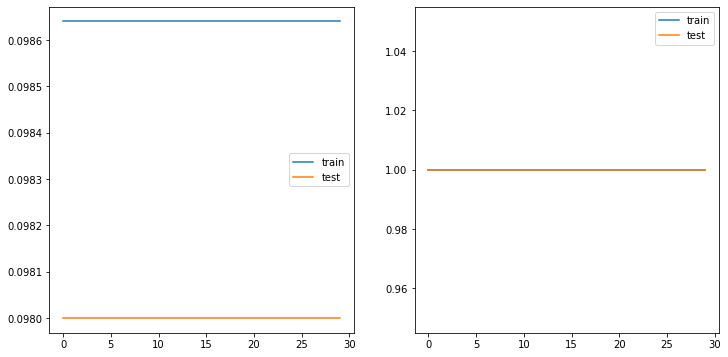

In [61]:
plot_results(results)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


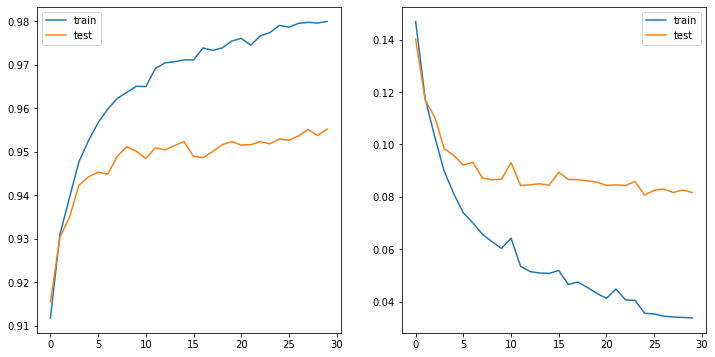

In [65]:
NET = Network(50)
results = NET.SGD(train_data, 30, 10, 3, sigmoid, sigmoid_prime, test_data)
    
plot_results(results)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


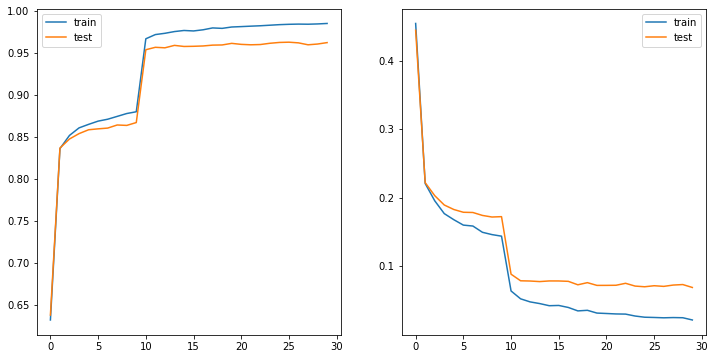

In [66]:
NET = Network(75)
results = NET.SGD(train_data, 30, 10, 3, sigmoid, sigmoid_prime, test_data)
    
plot_results(results)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


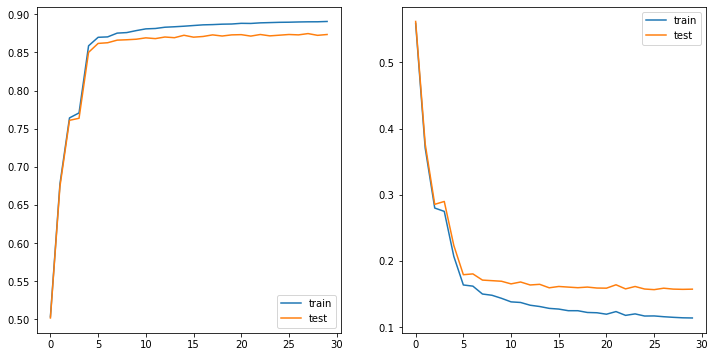

In [67]:
NET = Network(100)
results = NET.SGD(train_data, 30, 10, 3, sigmoid, sigmoid_prime, test_data)
    
plot_results(results)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


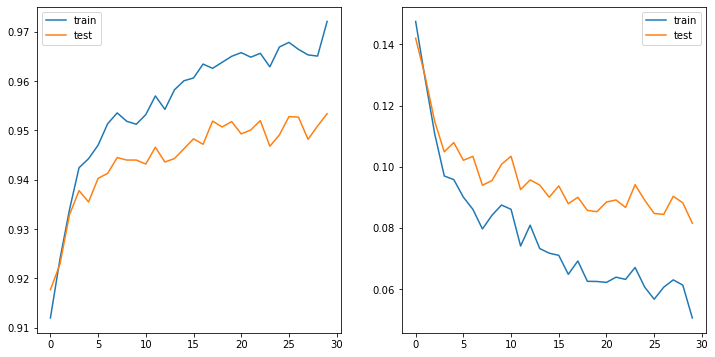

In [68]:
NET = Network(30)
results = NET.SGD(train_data, 30, 5, 3, sigmoid, sigmoid_prime, test_data)
    
plot_results(results)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


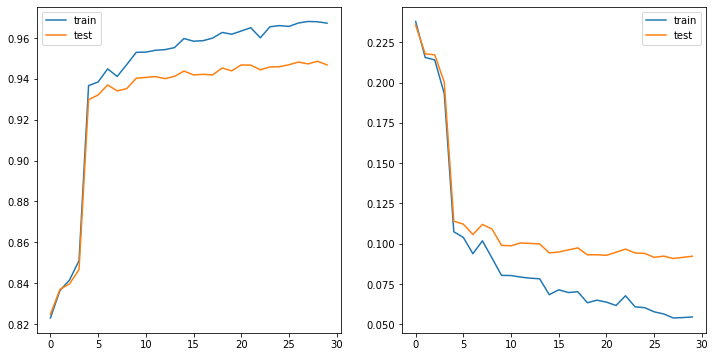

In [69]:
NET = Network(30)
results = NET.SGD(train_data, 30, 15, 3, sigmoid, sigmoid_prime, test_data)
    
plot_results(results)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


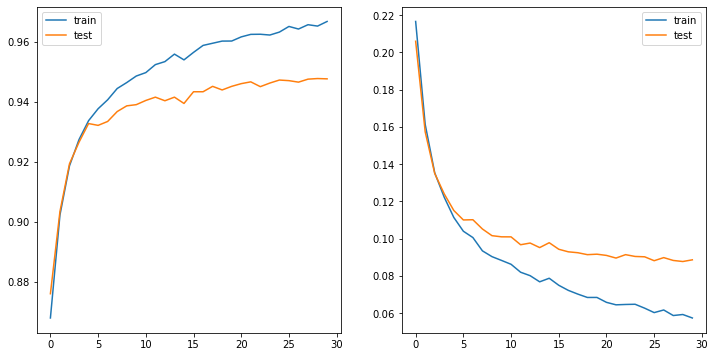

In [70]:
NET = Network(30)
results = NET.SGD(train_data, 30, 30, 3, sigmoid, sigmoid_prime, test_data)
    
plot_results(results)

### Report

-**First** when we use the ReLU the result is bad because ReLU is not used for the classification in the output layer and it removes all the negative values which makes it hard to distinguish some digits from the others fro classification and thus poor fit. <br>
-**Second** when we change the number of neuron to 50 the model performs well incremental on the test data. When we change number of neuron to 75, at some point a high jump of performance but then remains stagnant with no improvement even though there is a good performance. Now, from 100 neuron, the performance diminish and becomes steady with no improvement which suggests that we exceed the neurons needed for the training.<br>
-**Third** In class, we saw a good performance when we use the common minibatch of 10, but when decrease to 5, the performance is not affected compared to mini-batch of 10. However, increasing to a mini-batch of 15 and 30, we see a reduction in the accuracy (not drastic) compared to a mini-batch of 10. In conclusion, a mini-batch of 10 is commonly suitable to use.